# VaR by Parametric Method (also known as Variance-Covariance Method)

1. Install necessary libraries 
2. Define parameters (time range, tickers, portfolio value, simulations, confidence interval)
3. Download adjusted close prices (accounting for dividends and stock splits) 
4. Calculate daily log returns 
5. Assign equal weights to each asset in the portfolio
6. Calculate the historical returns for the portfolio
7. Calculate rolling sum of returns over the specified window of days 
8. VaR calculation using Parametric Method (also known as Vairance-Covariance method)
9. Display VaR values 
10. Plot the distribution of portfolio returns over the specified window of days 
11. Highlight VaR values for each confidence level 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Define parameters
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365 * years)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
portfolio_value = 1000000
days = 5
confidence_levels = [0.9, 0.95, 0.99]

In [3]:
# Download adjusted close prices (accounting for dividends and stock splits) 
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate daily log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()

In [5]:
# Assign equal weights to each asset in the portfolio
weights = np.array([1/len(tickers)] * len(tickers))

In [6]:
# Calculate historical returns for the portfolio
historical_returns = (log_returns * weights).sum(axis=1)

In [7]:
# Calculate rolling sum of returns over the specified window of days
range_returns = historical_returns.rolling(window=days).sum().dropna()

In [8]:
# VaR Calculation using Parametric Method (also known as Variance-Covariance method)
cov_matrix = log_returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

VaRs = [portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days/252) for cl in confidence_levels]

In [9]:
# Display VaR values
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)
for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 22,972.48
    95%:          $ 29,484.86
    99%:          $ 41,701.00


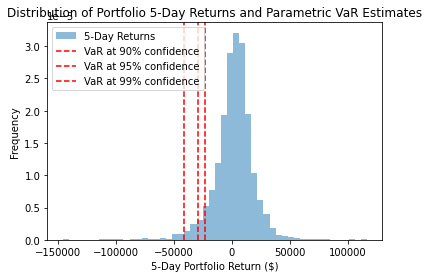

In [10]:
# Plot the distribution of portfolio returns over the specified window of days
plt.hist(range_returns * portfolio_value, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Highlight VaR values for each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label=f'VaR at {int(cl * 100)}% confidence')

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()